In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [4]:
root='.'
#root2='/Genomics/pritykinlab/zzhao/metabolic_analysis'
filename = f'{root}/data/th_data/GSE162300_DFMO_RNA_TPMs.tsv'
reaction_meta_file = f'{root}/data/compass_scrna/github_data/reaction_metadata.csv'
reaction_output_file = f'{root}/data/compass_scrna/github_data/reactions.tsv'
scrna_metadata_file = f'{root}/data/compass_scrna/geo_data/all_meta.csv'
out_dir = f'{root}/compass_comparison/scrna/'
#hypergeom_dir = f'{out_dir}scrna/'

In [5]:
reaction_metadata = pd.read_csv(reaction_meta_file, index_col = 0)
reaction_penalties = pd.read_csv(reaction_output_file, sep='\t', index_col=0)
reaction_metadata

,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
reaction_no_direction,,,,,,
10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](5) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial",1.00 * 10-formyltetrahydrofolate-[Glu](5) [m] ...,NaN,"Transport, mitochondrial",NaN,2.0
10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](6) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial",1.00 * 10-formyltetrahydrofolate-[Glu](6) [m] ...,NaN,"Transport, mitochondrial",NaN,2.0
10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal",1.00 * 10-formyltetrahydrofolate-[Glu](7) [c] ...,NaN,"Transport, lysosomal",NaN,2.0
...,...,...,...,...,...,...
MAL_Lte,Transport of L-malate,1.00 * (S)-malate(2-) [e] --> 1.00 * (S)-malat...,NaN,"Transport, extracellular",NaN,NaN
OROTGLUt,OROTGLUt,1.00 * L-glutamate(1-) [c] + 1.00 * Orotate [e...,SLC22A7,"Transport, extracellular",NaN,NaN
PNTOte,Transport of (R)-Pantothenate,1.00 * (R)-Pantothenate [e] --> 1.00 * (R)-Pan...,NaN,"Transport, extracellular",NaN,NaN


In [6]:
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [7]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [8]:
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab


In [9]:
reaction_consistencies

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,...,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
10FTHF5GLUtl_pos,3.560098,3.579258,3.485923,3.584638,3.515186,3.558645,3.558489,3.543815,3.543955,3.516090,...,3.519169,3.529113,3.505519,3.547540,3.556900,3.541081,3.550715,3.587909,3.556162,3.506701
10FTHF5GLUtm_pos,3.234027,3.244194,3.279274,3.254046,3.203246,3.230456,3.323853,3.323872,3.311300,3.200736,...,3.296751,3.286697,3.249583,3.287074,3.264088,3.261074,3.216091,3.343650,3.325867,3.192499
10FTHF6GLUtl_pos,3.409903,3.436089,3.310607,3.444044,3.348049,3.408090,3.408453,3.395481,3.397799,3.349607,...,3.355255,3.372460,3.334797,3.392539,3.405190,3.383008,3.396777,3.457350,3.407172,3.337523
10FTHF6GLUtm_pos,3.207974,3.226635,3.221804,3.237842,3.171089,3.201245,3.285225,3.283461,3.263414,3.157963,...,3.242711,3.238099,3.203860,3.253589,3.235269,3.222103,3.183784,3.324754,3.283187,3.143835
10FTHF7GLUtl_pos,3.321002,3.350895,3.235614,3.360219,3.250377,3.318999,3.343339,3.332772,3.330132,3.252261,...,3.285036,3.306437,3.243860,3.316514,3.326009,3.311316,3.305916,3.401467,3.340940,3.238800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824
sink_octdececoa(c)_neg,1.700189,1.700909,1.689598,1.741643,1.617176,1.672456,1.663766,1.745393,1.623148,1.670114,...,1.757744,1.667850,1.721753,1.714890,1.762804,1.724083,1.655184,1.684556,1.621820,1.754615
sink_pre_prot(r)_neg,7.563360,7.646562,7.633055,7.614586,7.544816,7.629731,7.588375,7.518963,7.542433,7.635217,...,7.618614,7.633269,7.537016,7.586845,7.598115,7.576199,7.690232,7.571615,7.576723,7.546652
sink_tetdec2coa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824


In [13]:
cell_metadata = pd.read_csv(scrna_metadata_file, sep=',', index_col=0)
cell_metadata.index = cell_metadata['cell_id']
cell_metadata

,cell_id,cell_type,NREADS,NALIGNED,geo
cell_id,,,,,
SRR2921289,SRR2921289,Th17p,1296320,922293,GSM1943112
SRR2921321,SRR2921321,Th17p,1320230,941281,GSM1943144
SRR2921373,SRR2921373,Th17p,2109040,1149880,GSM1943196
SRR2921293,SRR2921293,Th17p,1631870,1183900,GSM1943116
SRR2921400,SRR2921400,Th17p,1895830,1292000,GSM1943223
...,...,...,...,...,...
SRR2921699,SRR2921699,Th17n,2192860,1233820,GSM1943511
SRR2921671,SRR2921671,Th17n,2810280,1714280,GSM1943483
SRR2921633,SRR2921633,Th17n,1480070,996813,GSM1943445


In [14]:
Th17p_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17p']
Th17n_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17n']

In [40]:
# Th17p_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17p'].index
# print(Th17p_Vehicle)
# Th17n_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17n'].index
# print(Th17n_Vehicle)

In [19]:
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_cells, Th17n_cells)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [21]:
W = wilcox_results.merge(reaction_metadata, how='left', 
                         left_on='metadata_r_id', right_index=True, validate='m:1')
W = W[W['confidence'].isin([0,4])]
W = W[~W['EC_number'].isna()]
W.loc[(W['formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [22]:
wilcox_results.loc[['r0281_pos']]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
r0281_pos,9269.0,0.085969,-0.221507,0.153082,r0281


In [23]:
reaction_metadata.loc['r0281']['formula']

'1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putrescine [e] --> 1.00 * Ammonium [e] + 1.00 * Hydrogen peroxide [e] + 1.00 * 4-Aminobutanal [e]\nAOC1'

In [25]:
W[W['adjusted_pval']<0.05].sort_values(by=['adjusted_pval'])

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
NADPNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADPNe,"NADP nucleosidase,extracellular",1.00 * Water [e] + 1.00 * Nicotinamide adenine...,CD38,NAD metabolism,3.2.2.6,4.0
NADNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADNe,"NAD nucleosidase,extracellular",1.00 * Water [e] + 1.00 * Nicotinamide adenine...,CD38,NAD metabolism,3.2.2.5,4.0
r0281_neg,701.0,3.496712e-49,-1.191069,1.591753e-46,r0281,Putrescine:oxygen oxidoreductase (deaminating)...,1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putr...,AOC1,Methionine and cysteine metabolism,1.4.3.6,0.0
FACOAL1821_neg,3491.0,9.612729e-23,-1.211433,3.603642e-20,FACOAL1821,fatty-acid--CoA ligase,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4,Fatty acid oxidation,6.2.1.3,4.0
r1257_pos,3871.0,1.642885e-20,-1.175001,4.362544e-18,r1257,EC:6.2.1.3,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,ACSBG2; ACSL1; ACSL3; ACSL4; ACSL5; ACSL6; SLC...,Fatty acid oxidation,6.2.1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
RE1835C_pos,12169.0,1.895530e-02,0.248335,4.664174e-02,RE1835C,RE1835,1.00 * Water [c] + 1.00 * chenodeoxycholoyl co...,ACOT2; ACOT6; BAAT,Bile acid synthesis,3.1.2.2,0.0
r0283_pos,12169.0,1.895530e-02,0.248335,4.664174e-02,r0283,L-Histidine:beta-alanine ligase (AMP-forming) ...,1.00 * ATP [c] + 1.00 * beta-alanine [c] + 1.0...,CARNS1,beta-Alanine metabolism,6.3.2.11,0.0
P45027A15m_pos,12164.0,1.931471e-02,0.213556,4.737978e-02,P45027A15m,"5-beta-cytochrome P450, family 27, subfamily A...",1.00 * proton [m] + 1.00 * Nicotinamide adenin...,CYP27A1,Bile acid synthesis,1.14.13.15,4.0
PGI_neg,12161.0,1.953321e-02,0.304888,4.789732e-02,PGI,glucose-6-phosphate isomerase,1.00 * D-Glucose 6-phosphate [c] --> 1.00 * D-...,GPI1,Glycolysis/gluconeogenesis,5.3.1.9,0.0


In [26]:
W[W['adjusted_pval']<0.05]['subsystem'].value_counts()

Nucleotide interconversion        58
Unassigned                        57
Fatty acid oxidation              41
Sphingolipid metabolism           36
Blood group synthesis             25
                                  ..
beta-Alanine metabolism            1
Tetrahydrobiopterin metabolism     1
Butanoate metabolism               1
CoA catabolism                     1
Ubiquinone synthesis               1
Name: subsystem, Length: 69, dtype: int64

In [29]:
gene_set_all = []
for gene_list in W[W['adjusted_pval']<0.05]['associated_genes'].values:
    if type(gene_list) is not float:
        gene_set_all.extend(gene_list.split('; '))
print(len(gene_set_all))

1212


In [30]:
from collections import Counter
Counter(gene_set_all).most_common()

[('ACSL1', 24),
 ('GM20390', 15),
 ('NME2', 15),
 ('ALDH3A1', 14),
 ('ALDH3B1', 14),
 ('PNP2', 14),
 ('ALDH3B3', 13),
 ('ALDH1A3', 11),
 ('FUT9', 11),
 ('ALDH1B1', 9),
 ('ALDH3A2', 9),
 ('FPGS', 9),
 ('PFKL', 9),
 ('ALDH9A1', 8),
 ('AKR1A1', 8),
 ('PYCR1', 8),
 ('PYCR2', 8),
 ('RRM1', 8),
 ('RRM2', 8),
 ('RRM2B', 8),
 ('ALDH7A1', 7),
 ('ALDH2', 7),
 ('ACSL3', 7),
 ('SLC27A2', 7),
 ('HSD17B4', 7),
 ('FUT1', 7),
 ('XDH', 7),
 ('ACO1', 6),
 ('ACO2', 6),
 ('AKR1B3', 6),
 ('AKR7A5', 6),
 ('ACSBG2', 6),
 ('ACSL4', 6),
 ('ACAA1B', 6),
 ('EHHADH', 6),
 ('ST8SIA5', 6),
 ('ACADM', 5),
 ('CRAT', 5),
 ('ACSL5', 5),
 ('ACSL6', 5),
 ('ACOX1', 5),
 ('BCAT2', 5),
 ('NT5C', 5),
 ('NT5C3', 5),
 ('BCKDHA', 5),
 ('BCKDHB', 5),
 ('DBT', 5),
 ('ALDH4A1', 5),
 ('FDFT1', 5),
 ('LDHA', 4),
 ('LDHAL6B', 4),
 ('LDHB', 4),
 ('LDHC', 4),
 ('UEVLD', 4),
 ('AK5', 4),
 ('ATIC', 4),
 ('B3GALT4', 4),
 ('DCK', 4),
 ('BPGM', 4),
 ('PGAM1', 4),
 ('PGAM2', 4),
 ('ALDOART2', 4),
 ('ALDOB', 4),
 ('ALDOC', 4),
 ('MTHFD1', 4),

In [31]:
W['subsystem'].value_counts()

Fatty acid oxidation           251
Nucleotide interconversion     168
Unassigned                     101
N-glycan synthesis              61
Keratan sulfate degradation     60
                              ... 
beta-Alanine metabolism          2
Ubiquinone synthesis             1
Vitamin C metabolism             1
D-alanine metabolism             1
Transport, lysosomal             1
Name: subsystem, Length: 82, dtype: int64

# replicate figures

Text(0.5, 0, "Cohen's d")

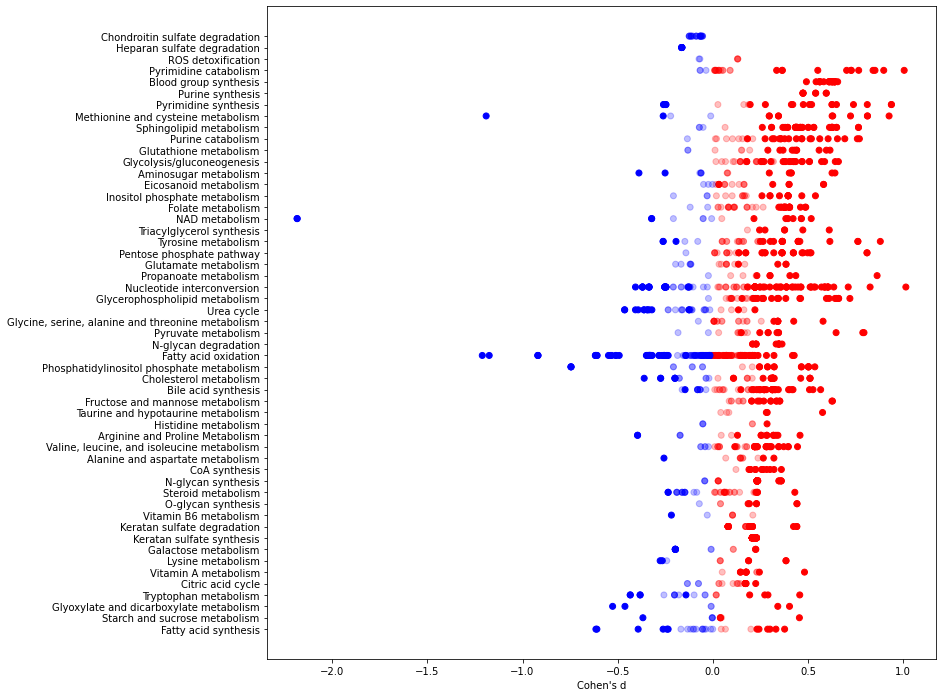

In [37]:
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")

Text(0.5, 0, "Cohen's d")

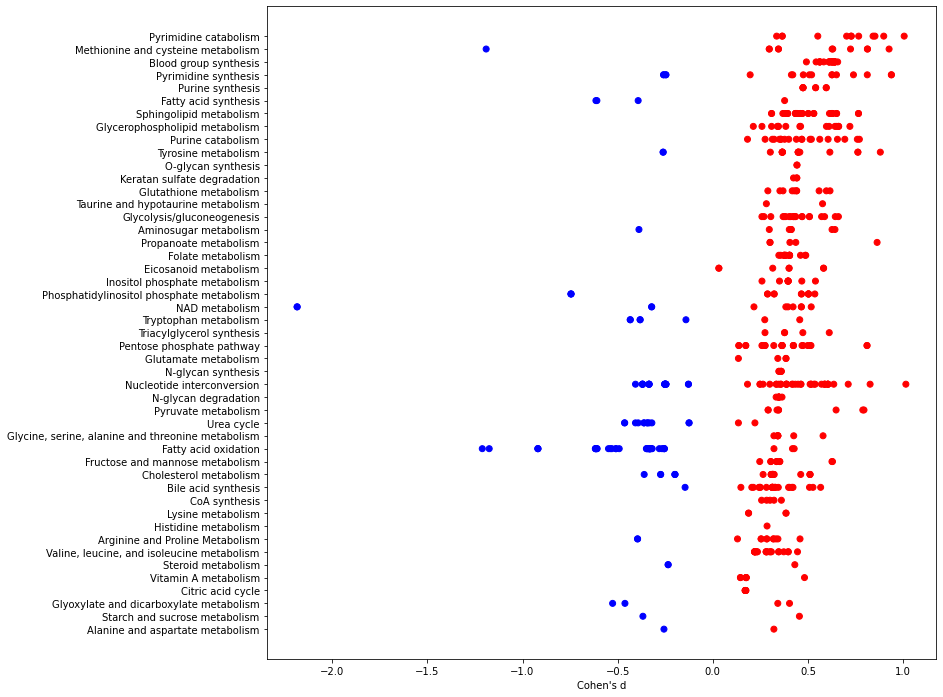

In [38]:
# only signficant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]

data = data[data['adjusted_pval'] < 0.05]

plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.1].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")

In [39]:
print(data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].quantile([.25]))

subsystem                                              
Alanine and aspartate metabolism                   0.25   -0.112165
Aminosugar metabolism                              0.25    0.349482
Arginine and Proline Metabolism                    0.25    0.222962
Bile acid synthesis                                0.25    0.249703
Blood group synthesis                              0.25    0.582890
Cholesterol metabolism                             0.25    0.264365
Citric acid cycle                                  0.25    0.170517
CoA synthesis                                      0.25    0.282877
Eicosanoid metabolism                              0.25    0.173526
Fatty acid oxidation                               0.25   -0.607775
Fatty acid synthesis                               0.25   -0.610363
Folate metabolism                                  0.25    0.374978
Fructose and mannose metabolism                    0.25    0.304740
Glutamate metabolism                               0.25    0

# compare results to hypergeom test

In [40]:
#data.to_csv(out_dir + 'compass_results_data_deseq.csv')

In [41]:
# data = pd.read_csv(out_dir + 'compass_results_data_deseq.csv', index_col = 0)
data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHXMANDACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHXMANDACOX_NADP_,"3,4-Dihydroxymandelaldehyde:NADP+ oxidoreductase",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1380_pos,12626.0,2.817520e-03,0.322824,9.607307e-03,r1380,delta24-sterol reductase Biosynthesis of stero...,1.00 * proton [r] + 1.00 * Nicotinamide adenin...,DHCR24,Cholesterol metabolism,1.3.1.72,0.0
r1381_neg,12576.0,3.535383e-03,0.315486,1.153661e-02,r1381,5alpha-Cholest-7-en-3beta-ol delta7-delta8-iso...,1.00 * 5alpha-cholest-7-en-3beta-ol [r] --> 1....,EBP,Cholesterol metabolism,5.3.3.5,0.0
r1384_neg,14208.5,1.883605e-07,0.357815,3.078015e-06,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0
r1384_pos,13305.0,8.191911e-05,0.416011,5.083452e-04,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0


In [42]:
sig_data = data[data['adjusted_pval'] < 0.05]
sig_data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,reaction_name,formula,associated_genes,subsystem,EC_number,confidence
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,Propanoate metabolism,1.1.1.27,4.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",1.00 * proton [c] + 1.00 * Nicotinamide adenin...,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,Tyrosine metabolism,1.1.1.1,4.0
34DHPLACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHPLACOX_pos,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
34DHXMANDACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHXMANDACOX_NADP_,"3,4-Dihydroxymandelaldehyde:NADP+ oxidoreductase",1.00 * Water [c] + 1.00 * Nicotinamide adenine...,ALDH3B1; ALDH3B3,Tyrosine metabolism,1.2.1.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
r1380_pos,12626.0,2.817520e-03,0.322824,9.607307e-03,r1380,delta24-sterol reductase Biosynthesis of stero...,1.00 * proton [r] + 1.00 * Nicotinamide adenin...,DHCR24,Cholesterol metabolism,1.3.1.72,0.0
r1381_neg,12576.0,3.535383e-03,0.315486,1.153661e-02,r1381,5alpha-Cholest-7-en-3beta-ol delta7-delta8-iso...,1.00 * 5alpha-cholest-7-en-3beta-ol [r] --> 1....,EBP,Cholesterol metabolism,5.3.3.5,0.0
r1384_neg,14208.5,1.883605e-07,0.357815,3.078015e-06,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0
r1384_pos,13305.0,8.191911e-05,0.416011,5.083452e-04,r1384,Guanosine aminohydrolase EC:3.5.4.15,1.00 * Water [c] + 1.00 * proton [c] + 1.00 * ...,NaN,Nucleotide interconversion,3.5.4.15,0.0


## subsystem level

In [44]:
pvn_sub_all = pd.read_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q_geo.csv', index_col = 0)
nvp_sub_all = pd.read_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q_geo.csv', index_col = 0)
pvn_sub = pvn_sub_all[pvn_sub_all['q'] < 0.05]
nvp_sub = nvp_sub_all[nvp_sub_all['q'] < 0.05]
subsystem_terms = pd.read_csv(out_dir + 'subsystem_term_names_geo.csv')['0']

In [45]:
sig_data[sig_data['cohens_d'] > 0]['subsystem'].value_counts()

Nucleotide interconversion                           37
Sphingolipid metabolism                              36
Blood group synthesis                                25
Bile acid synthesis                                  24
Pentose phosphate pathway                            24
Valine, leucine, and isoleucine metabolism           22
Purine catabolism                                    20
Glycolysis/gluconeogenesis                           20
Cholesterol metabolism                               19
Folate metabolism                                    17
Glycerophospholipid metabolism                       16
Tyrosine metabolism                                  15
Pyrimidine synthesis                                 13
Pyrimidine catabolism                                12
Phosphatidylinositol phosphate metabolism            11
Arginine and Proline Metabolism                      10
Methionine and cysteine metabolism                   10
Glutathione metabolism                          

In [53]:
pvn_sub.sort_values('p')

,term,p,padj,q
9,C5-branched dibasic acid metabolism,0.107877,NaN,0.0
8,Purine synthesis,0.141192,NaN,0.0
5,Aminosugar metabolism,0.197486,NaN,0.0
4,Fatty acid synthesis,0.204147,NaN,0.0
11,Vitamin B2 metabolism,0.204147,NaN,0.0
2,Folate metabolism,0.262501,NaN,0.0
0,Keratan sulfate synthesis,0.342129,NaN,0.0
7,Selenoamino acid metabolism,0.390392,NaN,0.0
6,Methionine and cysteine metabolism,0.456248,NaN,0.0
12,"Transport, lysosomal",0.476584,NaN,0.0


In [54]:
nvp_sub_all.sort_values('p')

,term,p,padj,q
0,Keratan sulfate synthesis,0.140807,NaN,0.680264
16,N-glycan synthesis,0.221627,NaN,0.680264
10,Oxidative phosphorylation,0.228752,NaN,0.680264
15,Heme synthesis,0.313308,NaN,0.680264
13,Chondroitin sulfate degradation,0.431016,NaN,0.680264
7,Selenoamino acid metabolism,0.557235,NaN,0.680264
6,Methionine and cysteine metabolism,0.633188,NaN,0.680264
12,"Transport, lysosomal",0.655496,NaN,0.680264
14,Lysine metabolism,0.696131,NaN,0.680264
5,Aminosugar metabolism,0.748291,NaN,0.680264


In [55]:
# 1: get proportion of shared items that are significant
def get_overlap(compass, hypergeom, col1 = 'term', col2 = 'subsystem'):
    intersection = len(set(hypergeom[col1]) & set(compass[col2]))
    return intersection/len(set(compass[col2])), intersection/len(set(hypergeom[col1]))

In [57]:
# 2: get correlation between cohen's d & q value for all
def get_correlation(compass, hypergeom, how = 'pearson', col1 = 'term', col2 = 'subsystem'):
    compass_df = compass.groupby(col2).mean()
    hypergeom_df = hypergeom.copy()
    hypergeom_df.index = hypergeom_df[col1]
    shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
    hypergeom_df = hypergeom_df.loc[shared_subsystems]
    compass_df = compass_df.loc[shared_subsystems]
    if len(shared_subsystems) > 1:
        if how == 'pearson':
            res = stats.pearsonr(hypergeom_df['q'], abs(compass_df['cohens_d']))[0]
        elif how == 'spearman':
            res = stats.spearmanr(hypergeom_df['q'], abs(compass_df['cohens_d']))[0]
        else:
            raise(f'how should be pearson or spearman')
        return res
    else:
        return np.nan

In [58]:
# 3: hypergeometric for overlap between significant results
def get_hypergeom_overlap(compass, hypergeom, all_terms = subsystem_terms, col1 = 'term', col2 = 'subsystem'):
    compass_d = set(compass[compass['adjusted_pval']< 0.05][col2])
    compass_d = compass_d & set(all_terms)
    M = len(all_terms)
    n = len(hypergeom) # number of met genes
    N = len(compass_d)
    x = len(compass_d & set(hypergeom[col1]))
    pct_overlap = x/(N+n)
    hypergeom_model = stats.hypergeom(M=M, n=n, N=N)
    p_val = hypergeom_model.sf(x-1)
    return p_val

**for enrichment in pathogenic**

In [60]:
de_p_vals = pvn_sub
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_length: {pvn_sub_overlap[1]}")

compass length: 47 hypergeom_length: 13
n overlap: 7
compass overlap: 0.14893617021276595 hypergeom_length: 0.5384615384615384


In [61]:
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [62]:
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

hypergeometric test: 0.978230777084574


**for enrichment in non-pathogenic**

In [63]:
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_length: {nvp_sub_overlap[1]}")

compass length: 18 hypergeom_length: 0
n overlap: 0


ZeroDivisionError: division by zero

In [64]:
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [65]:
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

hypergeometric test: 1.0


**both results**

In [66]:
print('pathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_overlap: {pvn_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")
print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

pathogenic enriched terms
---raw proportion overlap---
compass length: 47 hypergeom_length: 13
n overlap: 7
compass overlap: 0.14893617021276595 hypergeom_overlap: 0.5384615384615384

---correlation---
correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan

---hypergeometric test for overlap---
hypergeometric test: 0.978230777084574


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [67]:
print('nonpathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_overlap: {nvp_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")
print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

nonpathogenic enriched terms
---raw proportion overlap---
compass length: 18 hypergeom_length: 0
n overlap: 0


ZeroDivisionError: division by zero

## reaction level

In [70]:
pvn_rxn_all = pd.read_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q_rxn_geo.csv', index_col = 0)
nvp_rxn_all = pd.read_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q_rxn_geo.csv', index_col = 0)
pvn_rxn = pvn_rxn_all[pvn_rxn_all['q'] < 0.05]
nvp_rxn = nvp_rxn_all[nvp_rxn_all['q'] < 0.05]

In [71]:
sig_pvn = sig_data[sig_data['cohens_d'] > 0]
sig_nvp = sig_data[sig_data['cohens_d'] < 0]

In [237]:
# first pass: replicate subsystem functions

In [72]:
print('pathogenic enriched terms - reactions')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id'].unique())} hypergeom_length: {len(pvn_rxn)}")
print(f"n overlap: {len(set(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id']) & set(pvn_rxn['term']))}")
pvn_rxn_overlap = get_overlap(sig_pvn[sig_pvn['cohens_d'] > 0], pvn_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {pvn_rxn_overlap[0]} hypergeom_length: {pvn_rxn_overlap[1]}")

print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

pathogenic enriched terms - reactions
---raw proportion overlap---
compass length: 417 hypergeom_length: 43
n overlap: 6
compass overlap: 0.014388489208633094 hypergeom_length: 0.13953488372093023

---correlation---
correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan

---hypergeometric test for overlap---
hypergeometric test: 1.0


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [73]:
print('nonpathogenic enriched terms - reactions')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id'].unique())} hypergeom_length: {len(nvp_rxn)}")
print(f"n overlap: {len(set(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id']) & set(nvp_rxn['term']))}")
nvp_rxn_overlap = get_overlap(sig_nvp[sig_nvp['cohens_d'] < 0], nvp_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {nvp_rxn_overlap[0]} hypergeom_length: {nvp_rxn_overlap[1]}")

print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

nonpathogenic enriched terms - reactions
---raw proportion overlap---
compass length: 96 hypergeom_length: 63
n overlap: 6
compass overlap: 0.0625 hypergeom_length: 0.09523809523809523

---correlation---
correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan

---hypergeometric test for overlap---
hypergeometric test: 0.9913271312878498


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [77]:
pvn_rxn

,term,p,padj,q
0,5HTRPDOX,0.037331,NaN,0.0
1,ACGAM6PSi,0.037331,NaN,0.0
2,ACP1_FMN_,0.141192,NaN,0.0
3,ADK1m,0.073273,NaN,0.0
4,ADPGLC,0.037331,NaN,0.0
5,ADPMAN,0.037331,NaN,0.0
6,ADPRDP,0.037331,NaN,0.0
7,ADSL1,0.037331,NaN,0.0
8,ADSL2,0.037331,NaN,0.0
9,ATPasel,0.476584,NaN,0.0


In [107]:
colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'blue'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'red'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'purple'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'darkred'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
colors

,metadata_r_id,cohens_d,c,pvn,nvp,c2
2HBO_pos,2HBO,0.405221,red,False,False,red
34DHOXPEGOX_pos,34DHOXPEGOX,0.762535,red,False,False,red
34DHPLACOX_NADP__neg,34DHPLACOX_NADP_,0.365011,red,False,False,red
34DHPLACOX_pos,34DHPLACOX,0.365011,red,False,False,red
34DHXMANDACOX_NADP__neg,34DHXMANDACOX_NADP_,0.365011,red,False,False,red
...,...,...,...,...,...,...
r1380_pos,r1380,0.322824,red,False,False,red
r1381_neg,r1381,0.315486,red,False,False,red
r1384_neg,r1384,0.357815,red,False,False,red
r1384_pos,r1384,0.416011,red,False,False,red


2HBO_pos                   red
34DHOXPEGOX_pos            red
34DHPLACOX_NADP__neg       red
34DHPLACOX_pos             red
34DHXMANDACOX_NADP__neg    red
                          ... 
r1380_pos                  red
r1381_neg                  red
r1384_neg                  red
r1384_pos                  red
r1488_pos                  red
Name: c2, Length: 580, dtype: object

In [115]:
colors.value_counts(['c2', 'pvn', 'nvp'])

c2             pvn    nvp  
lavenderblush  False  False    460
paleturquoise  False  False    103
darkblue       False  True       9
red            True   False      6
darkviolet     True   True       2
dtype: int64

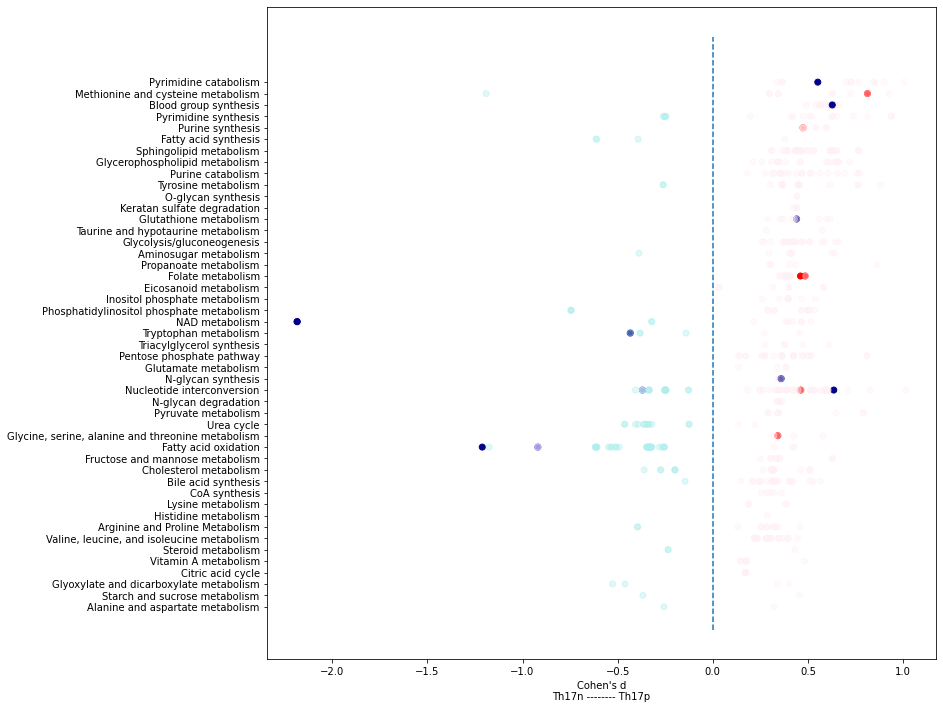

In [117]:
# only significant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
#color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')

colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'paleturquoise'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'lavenderblush'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'darkviolet'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'red'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
color = colors['c2']

#alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
alpha = colors['c2'].map(lambda x: .4 if ((x == 'lavenderblush') or (x == 'paleturquoise')) else 1)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d\nTh17n -------- Th17p")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

In [ ]:
# plot only ones from our results

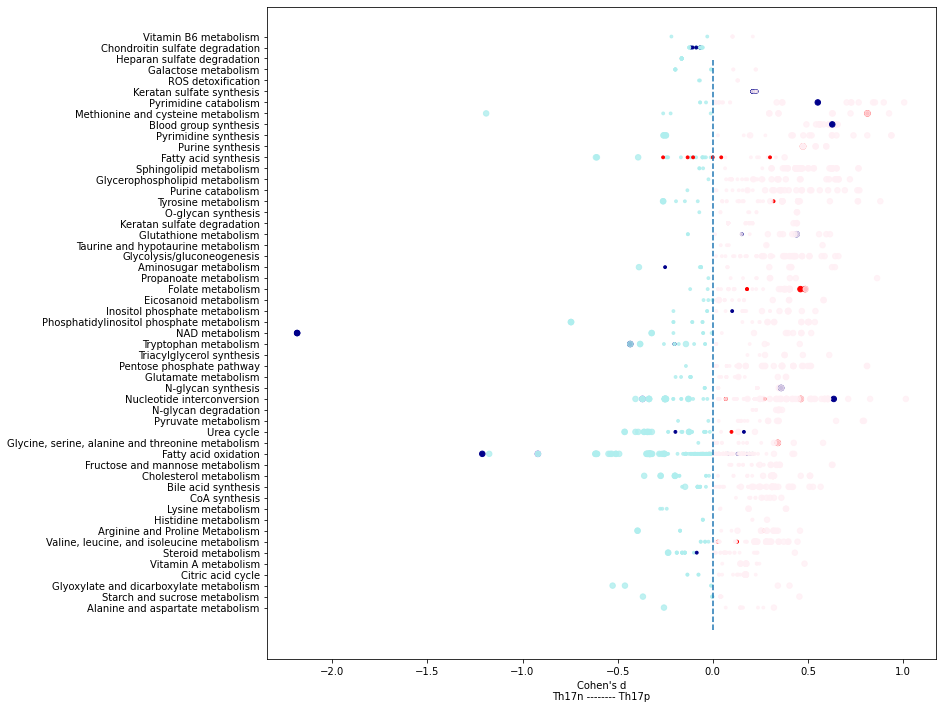

In [125]:
# only significant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
#data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
#color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')

colors = data[['metadata_r_id', 'cohens_d']].copy()
colors['c'] = 'paleturquoise'
colors.loc[colors['cohens_d'] >= 0, 'c'] = 'lavenderblush'
colors['pvn'] = [i in list(pvn_rxn['term']) for i in colors['metadata_r_id']]
colors['nvp'] = [i in list(nvp_rxn['term']) for i in colors['metadata_r_id']]
colors['c2'] = colors['c']
colors.loc[(colors['pvn']) & (colors['nvp']), 'c2'] = 'darkviolet'
colors.loc[(colors['pvn']) & (~colors['nvp']), 'c2'] = 'red'
colors.loc[(~colors['pvn']) & (colors['nvp']), 'c2'] = 'darkblue'
color = colors['c2']

#alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
alpha = colors['c2'].map(lambda x: .8 if ((x == 'lavenderblush') or (x == 'paleturquoise')) else 1)
size = data['adjusted_pval'].map(lambda x: 30 if x < 0.05 else 8)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha, s = size)
axs.set_xlabel("Cohen's d\nTh17n -------- Th17p")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

# plot below

In [27]:
import matplotlib.pyplot as plt
import matplotlib
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-6.2, 6.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('Th17p_V', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('Th17n_V', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

In [28]:
filtered_data = pd.concat([W[W['subsystem'] == "Nucleotide interconversion"],
                           W[W['subsystem'] == "Fatty acid oxidation"],
                           W[W['subsystem'] == "Keratan sulfate synthesis"],
                           W[W['subsystem'] == "Keratan sulfate degradation"],
                          ])

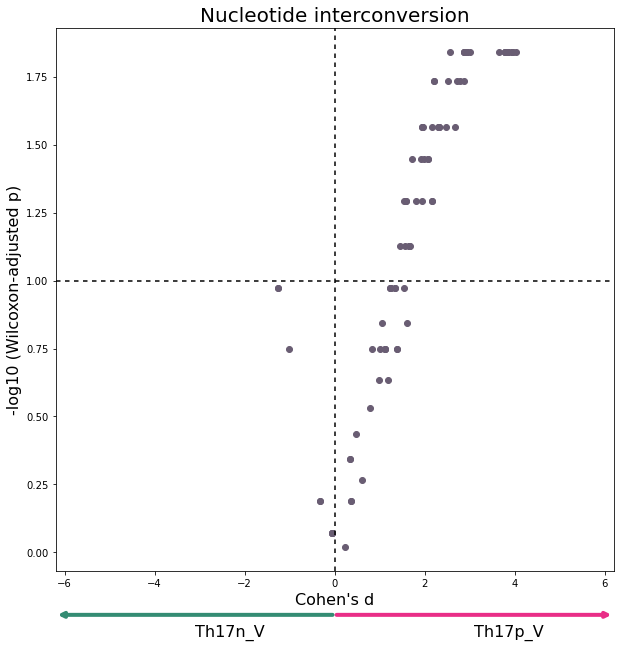

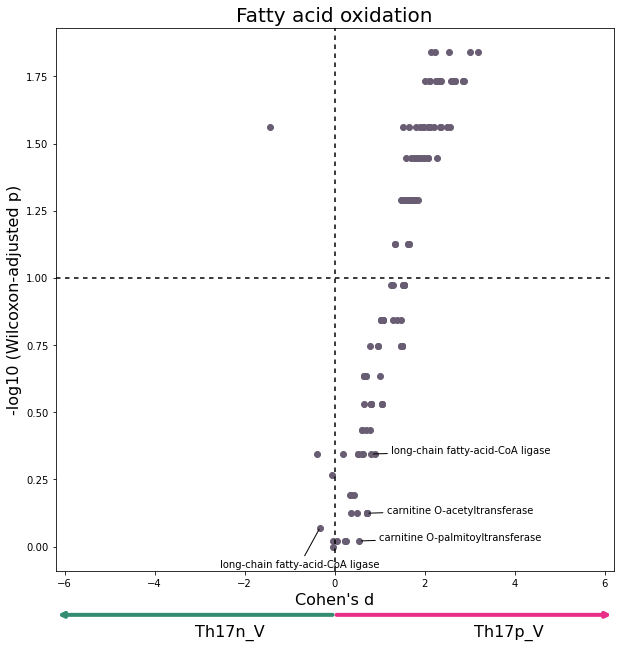

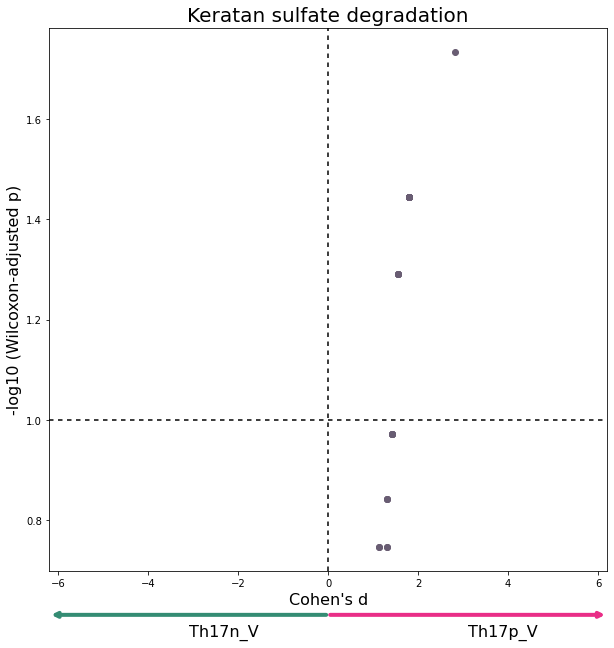

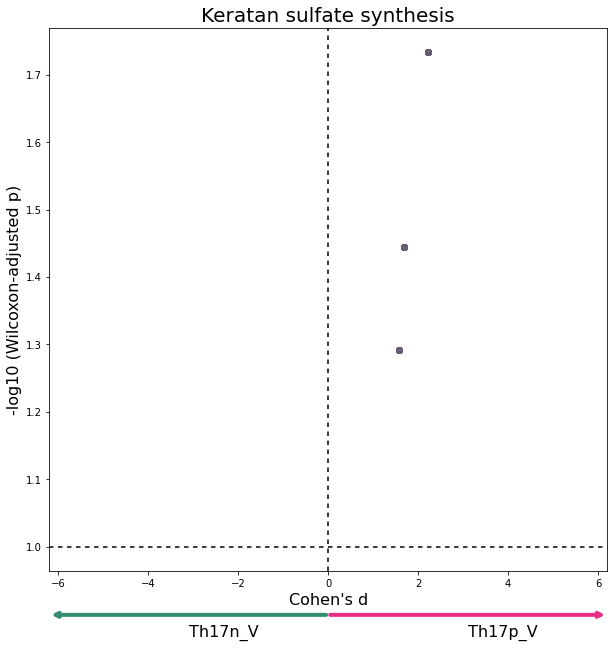

In [29]:
for item in filtered_data['subsystem'].value_counts().keys():
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")

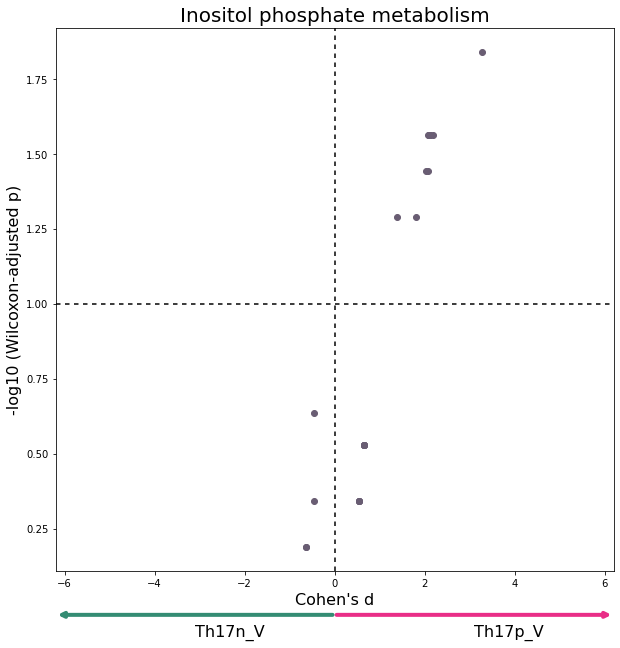

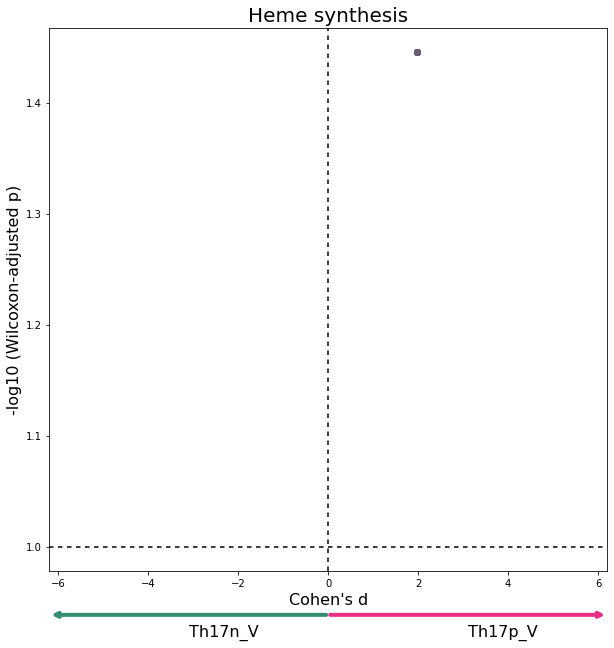

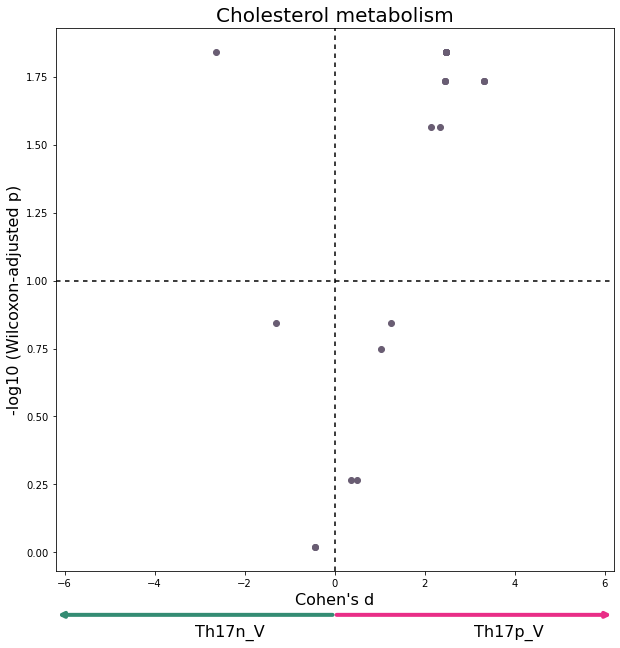

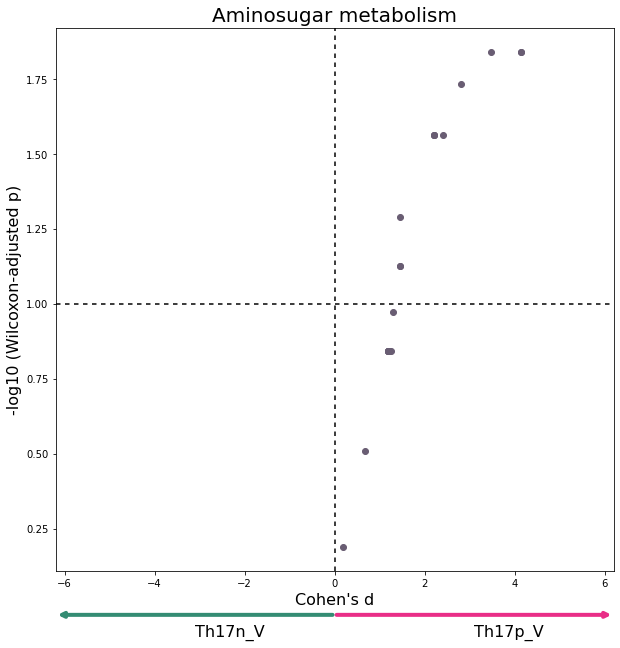

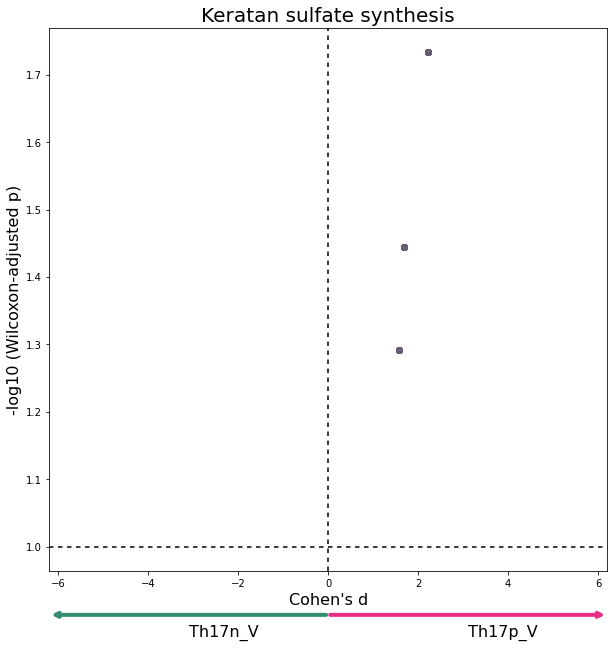

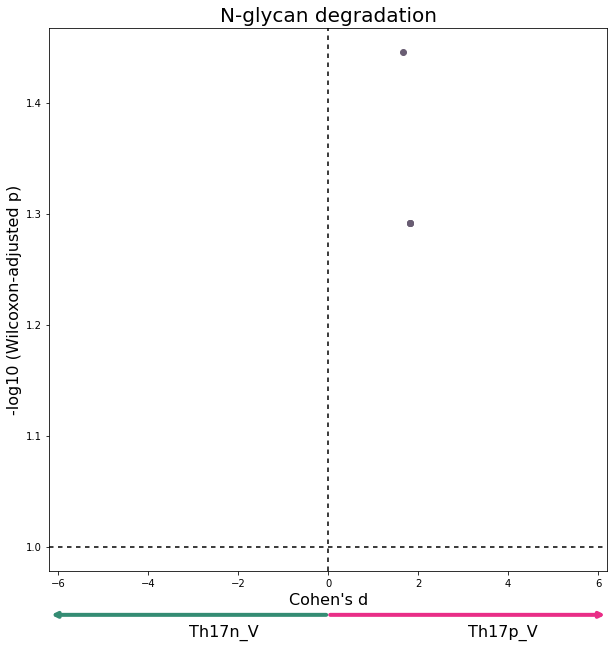

In [30]:
keys = ["Inositol phosphate metabolism", "Heme synthesis", "Cholesterol metabolism", 
        "Aminosugar metabolism", "Keratan sulfate synthesis", "N-glycan degradation"]
for item in keys:
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")